In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
(X_Train,_),(_,_) = mnist.load_data()

In [3]:
#X_Train = X_Train.reshape(X_Train.shape[0],X_Train.shape[1],X_Train.shape[2],1)
X_Train = X_Train.reshape((*X_Train.shape,1))

In [4]:
# Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5

In [5]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

#Use these Adam Params for GAN's
adam = Adam(lr=2e-4,beta_1=0.5)

In [6]:
# Define the Generator
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double Activation Size 14 X 14 X 64
#generator.add(UpSampling2D())
generator.add(Conv2DTranspose(64,kernel_size=(5,5),strides=(2,2),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double Activation Size 28 X28 X 1
#generator.add(UpSampling2D())
generator.add(Conv2DTranspose(1,kernel_size=(5,5),strides=(2,2),padding='same',activation='tanh'))

# Compile the Generator
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [7]:
# Define the Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(128,kernel_size=(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

# Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

# Compile the Discriminator
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [8]:
def save_imgs(epoch,samples=100):
  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))

  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
  
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

In [9]:
!mkdir images
!mkdir models

A subdirectory or file images already exists.
A subdirectory or file models already exists.


In [10]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_ouput = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_ouput)
model.compile(loss='binary_crossentropy',optimizer=adam)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


Epoch 1 D loss: 186.738702 G loss: 136.634217
Epoch 2 D loss: 329.135896 G loss: 210.406876
Epoch 3 D loss: 320.020177 G loss: 212.164808
Epoch 4 D loss: 318.575993 G loss: 210.270221
Epoch 5 D loss: 323.961665 G loss: 203.116319
Epoch 6 D loss: 323.379356 G loss: 200.872203
Epoch 7 D loss: 323.320569 G loss: 199.658450
Epoch 8 D loss: 323.273166 G loss: 198.606414
Epoch 9 D loss: 322.906854 G loss: 199.523528
Epoch 10 D loss: 322.454861 G loss: 200.363436


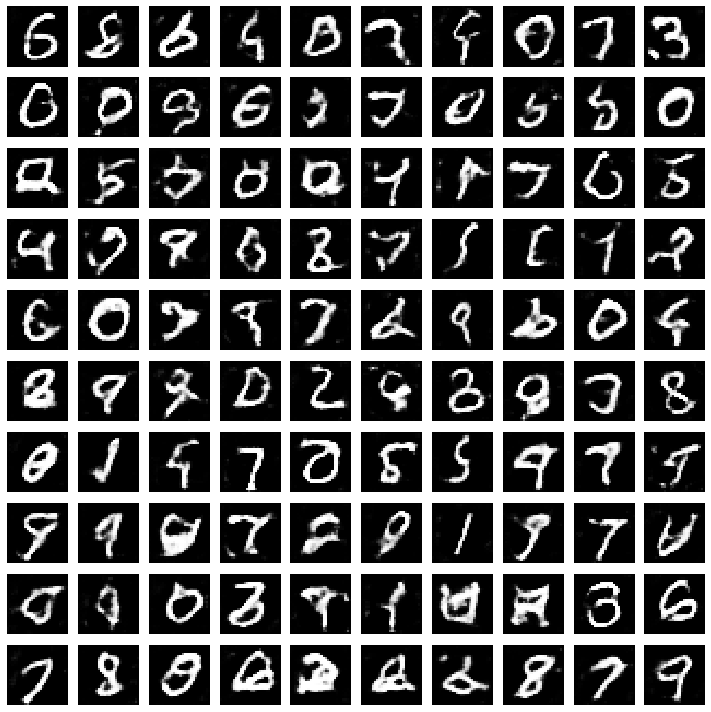

Epoch 11 D loss: 322.534477 G loss: 197.598511
Epoch 12 D loss: 321.528583 G loss: 203.415787
Epoch 13 D loss: 321.841945 G loss: 197.847705
Epoch 14 D loss: 321.536415 G loss: 198.878118
Epoch 15 D loss: 320.268214 G loss: 207.059136
Epoch 16 D loss: 320.645863 G loss: 198.995822
Epoch 17 D loss: 320.583291 G loss: 199.516030
Epoch 18 D loss: 320.251667 G loss: 200.565901
Epoch 19 D loss: 320.051508 G loss: 201.620564
Epoch 20 D loss: 319.790087 G loss: 202.224955


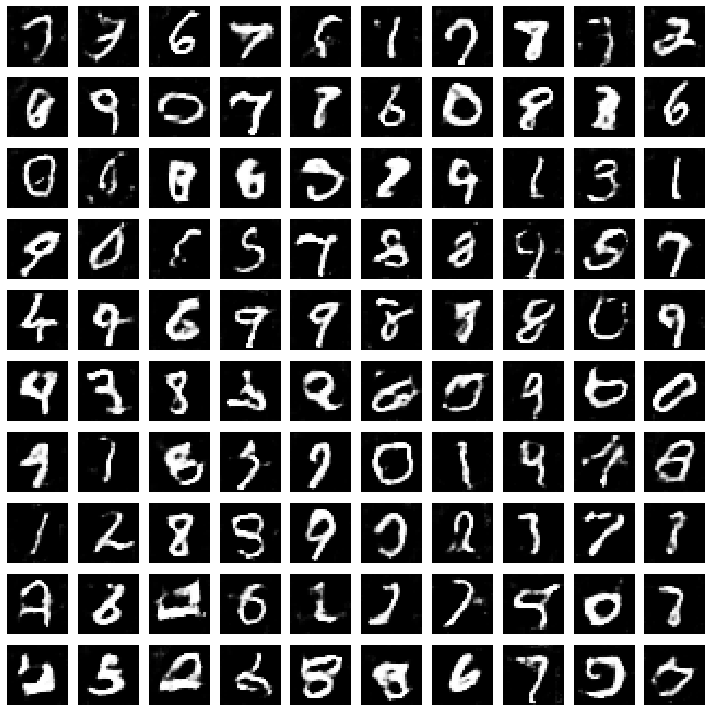

Epoch 21 D loss: 319.188238 G loss: 202.913216
Epoch 22 D loss: 319.091148 G loss: 202.810682
Epoch 23 D loss: 318.685421 G loss: 204.097823
Epoch 24 D loss: 318.565755 G loss: 204.546338
Epoch 25 D loss: 318.013344 G loss: 205.008087
Epoch 26 D loss: 317.612350 G loss: 205.434493
Epoch 27 D loss: 317.445260 G loss: 206.052047
Epoch 28 D loss: 317.010602 G loss: 206.924311
Epoch 29 D loss: 316.718728 G loss: 208.227997
Epoch 30 D loss: 316.478920 G loss: 208.091796


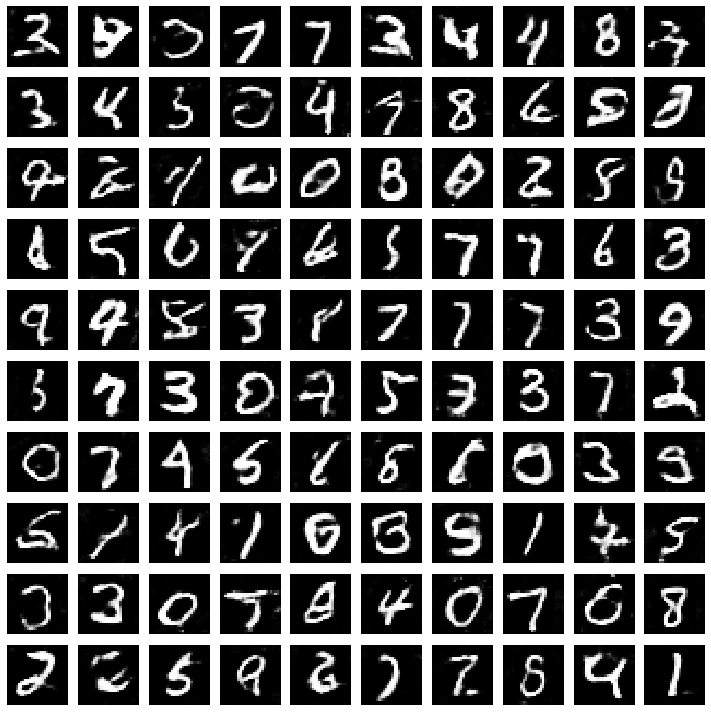

Epoch 31 D loss: 315.756964 G loss: 208.908328
Epoch 32 D loss: 315.715106 G loss: 210.004415
Epoch 33 D loss: 315.267635 G loss: 211.479250
Epoch 34 D loss: 314.688291 G loss: 211.631768
Epoch 35 D loss: 314.299801 G loss: 212.691110
Epoch 36 D loss: 314.116640 G loss: 212.636870
Epoch 37 D loss: 313.430487 G loss: 214.665714
Epoch 38 D loss: 313.219926 G loss: 214.735119
Epoch 39 D loss: 312.609298 G loss: 215.533816
Epoch 40 D loss: 312.305617 G loss: 217.496308


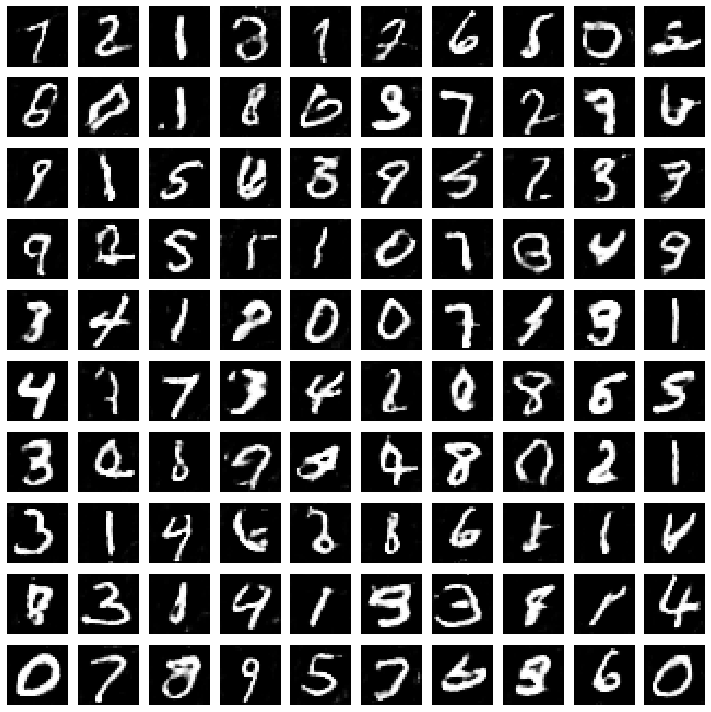

Epoch 41 D loss: 311.737401 G loss: 218.019320
Epoch 42 D loss: 311.506756 G loss: 218.787243
Epoch 43 D loss: 310.935058 G loss: 219.709999
Epoch 44 D loss: 310.419879 G loss: 220.593447
Epoch 45 D loss: 310.709657 G loss: 221.398628
Epoch 46 D loss: 309.668082 G loss: 221.879010
Epoch 47 D loss: 308.963333 G loss: 223.746047
Epoch 48 D loss: 309.102721 G loss: 224.526203
Epoch 49 D loss: 308.196695 G loss: 225.444214
Epoch 50 D loss: 308.008374 G loss: 225.984009


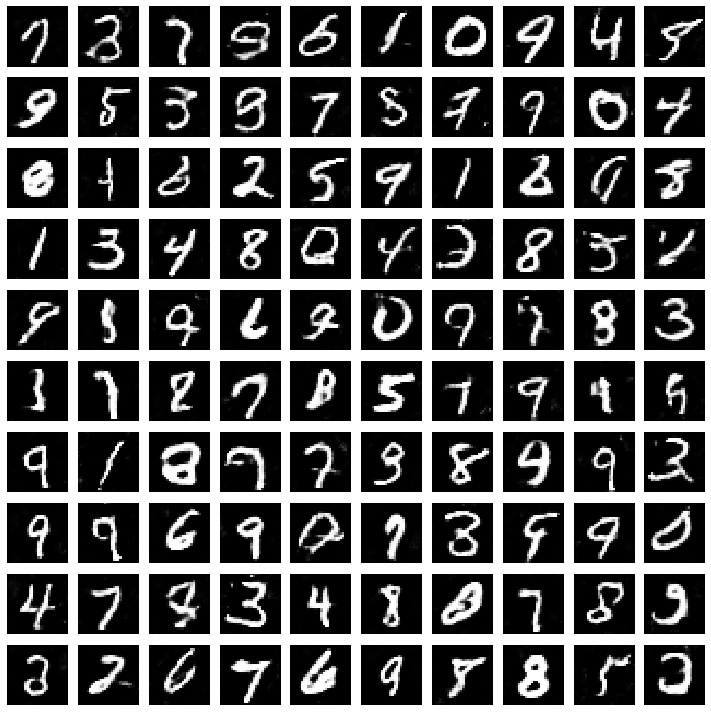

In [12]:
epoch_d_losses = []
epoch_g_losses = []

for epoch in range(NUM_EPOCHS):
  epoch_d_loss = 0.
  epoch_g_loss = 0.

  for _ in range(NO_OF_BATCHES):
    idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
    real_imgs = X_Train[idx]
    real_y = np.ones((HALF_BATCH_SIZE,1))*0.9
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #TRaining Discriminator on Real Samples

    d_noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs = generator.predict(d_noise)
    fake_y = np.zeros((HALF_BATCH_SIZE,1))
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) #Training Discriminator on Fake Samples

    g_noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(g_noise,ground_truth)

    epoch_g_loss += g_loss
    d_loss = d_loss_real + d_loss_fake
    epoch_d_loss += d_loss

  epoch_d_losses.append(epoch_d_loss)
  epoch_g_losses.append(epoch_g_loss) 

  print('Epoch %d D loss: %f G loss: %f' %((epoch+1),epoch_d_loss,epoch_g_loss))

  if (epoch+1)%10==0:
    generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
    save_imgs(epoch)